# 9 绘图与可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 要启用交互式绘图，需要执行以下命令
#%matplotlib notebook

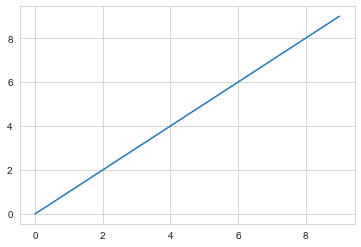

In [2]:
data = np.arange(10)
plt.plot(data)
plt.show()

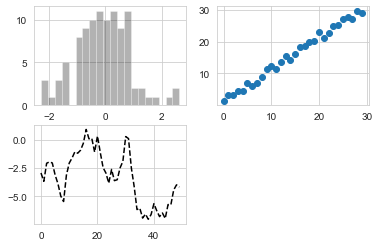

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.rand(30))
# 下面一条命令会在最后一个子图中绘制图表
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

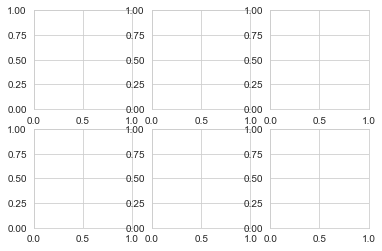

In [4]:
fig, axes = plt.subplots(2, 3)
axes

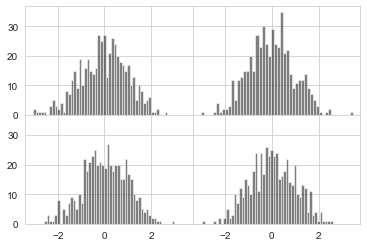

In [5]:
# 调整子图周围的间距
# subplots_adjust
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

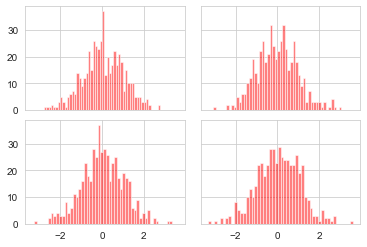

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

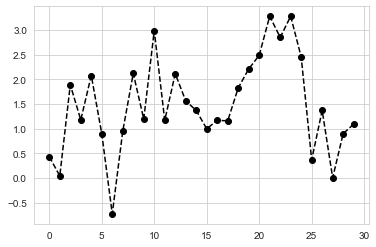

In [7]:
# 颜色、标记和线类型
plt.plot(np.random.randn(30).cumsum(), 'ko--')
plt.show()

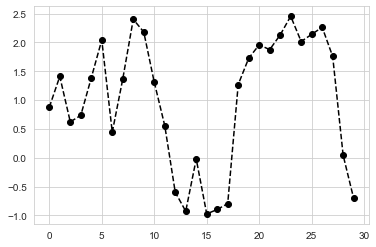

In [8]:
# 上面的代码可以写的更为显式
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
plt.show()

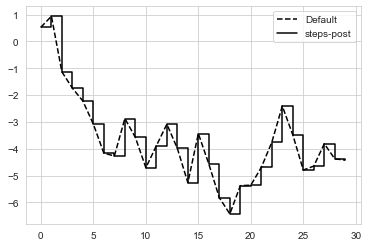

In [9]:
# 对于折线图，注意到后续的点都是线性内插的，可以通过drawstyle选项进行更改
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

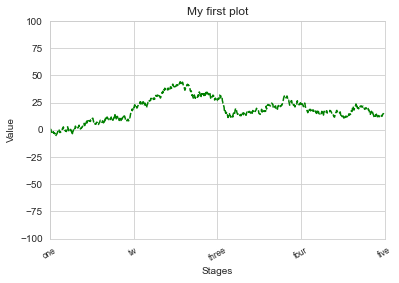

In [10]:
# 设置标题、轴标签、刻度和刻度标签
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'tw', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_xlim([0, 1000])
ax.set_ylim([-100, 100])
ax.set_title('My first plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Value')
ax.plot(np.random.randn(1000).cumsum(), color='g', linestyle='dashed')
plt.show()

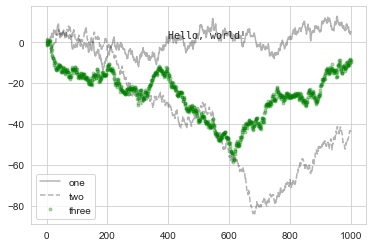

In [11]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one', alpha=0.3)
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two', alpha=0.3)
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three', alpha=0.3)
ax.legend(loc='best')
# 注释与加工子图
ax.text(400, 2, 'Hello, world!', family='monospace', fontsize=10)
plt.show()

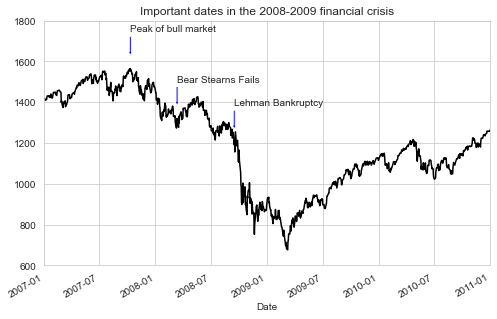

In [12]:
# 注释与子图加工 金融危机中的重要日期
from datetime import datetime

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
data = pd.read_csv("./examples/spx.csv", index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
for date, label in crisis_data:
    # ax.annotate可以在指定的x, y坐标上绘制标签
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='blue', headwidth=4, width=2, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")
plt.show()

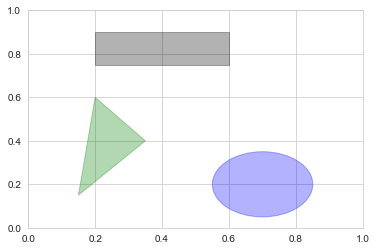

In [13]:
# 想在图表中添加图形时，需要生成patch对象shp，并调用ax.add_patch(shp)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# 将图片保存到文件
# dpi：每英寸像素点数， bbox_inches可以剪去实际图形的空白，tight使用最小空白
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
plt.show()

In [14]:
# matplotlib中所有的行为都可通过广泛的全局参数来定制
# 例如设置图片的大小，全局都设置为（10x8）
plt.rc('figure', figsize=(8, 6))
# rc的第一个参数是想要自定义的组件，比如figure，axes，xtick，ytick，grid，legend等，
# 之后可以按照关键字参数的序列指定新的参数
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 12
                }
plt.rc('font', **font_options)

## 9.2 使用pandas和seaborn绘图

### 9.2.1 折线图

<AxesSubplot:>

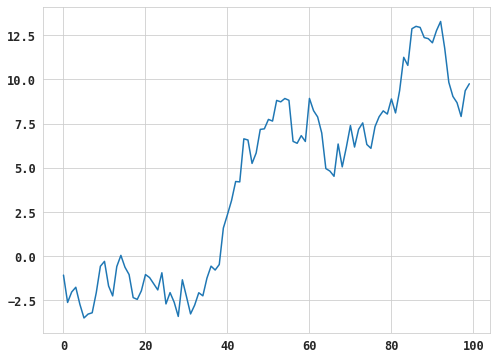

In [15]:
s = pd.Series(np.random.randn(100).cumsum(), index=np.arange(0, 100, 1))
s.plot()
# Series对象的索引传入matplotlib作为绘图的x轴，也可以通过use_index=False来禁用这个功能

<AxesSubplot:>

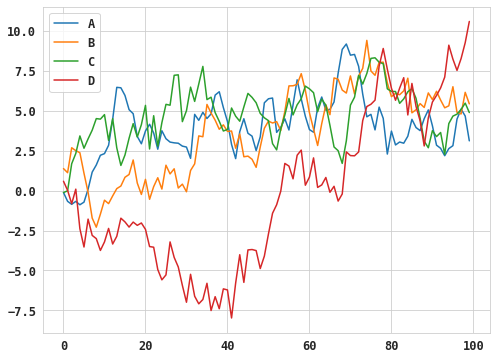

In [16]:
# DataFrame的plot当大将每一列单独绘制一条曲线
df = pd.DataFrame(np.random.randn(100, 4).cumsum(0),
                  columns=list('ABCD'),
                  index=np.arange(0, 100, 1))
df.plot()

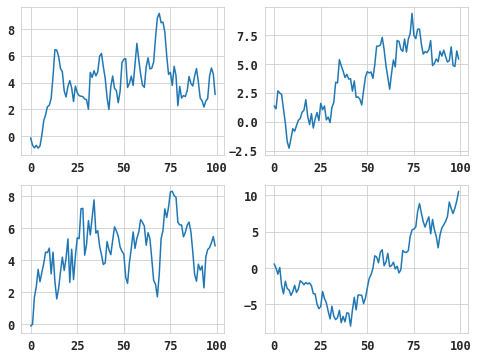

In [17]:
# 将df的每一列单独绘制到一个子图中
fig = plt.figure()
df_col = df.columns.tolist()

for i in range(1, 5):
    ax_ = fig.add_subplot(2, 2, i)
    df[df_col[i - 1]].plot(ax=ax_)

### 9.2.2 柱状图

<AxesSubplot:>

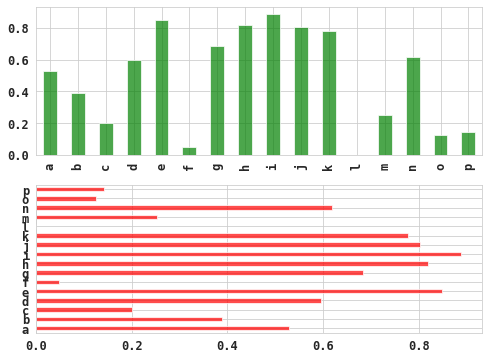

In [18]:
# plt.bar() 垂直柱状图
# plt.barh() 水平柱状图
fig, ax = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=ax[0], color='g', alpha=0.7)
data.plot.barh(ax=ax[1], color='r', alpha=0.7)

<AxesSubplot:>

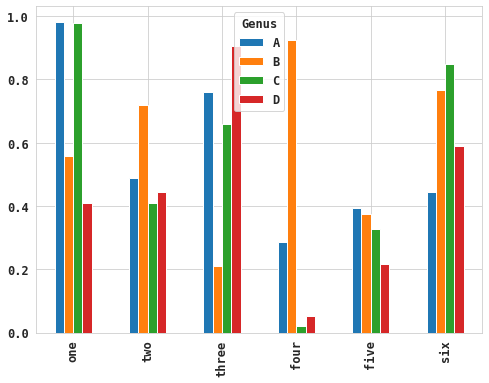

In [19]:
# 在DataFrame中，每一列行中的值分组到并排的柱子中的一组
df = pd.DataFrame(np.random.rand(6, 4),
                  columns=pd.Index(list('ABCD'), name='Genus'),
                  index=['one', 'two', 'three', 'four', 'five', 'six'])
df.plot.bar()

<AxesSubplot:>

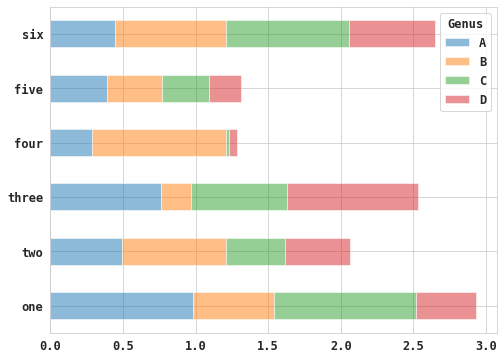

In [20]:
# stacked=True表示生成堆叠图
df.plot.barh(stacked=True, alpha=0.5)

In [21]:
# 绘制一个堆积柱状图，用于展示每个派对在每天的数据点占比
tips = pd.read_csv("./examples/tips.csv")
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [22]:
# 1人派对和6人派对比较少
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [23]:
# 再执行标准化
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

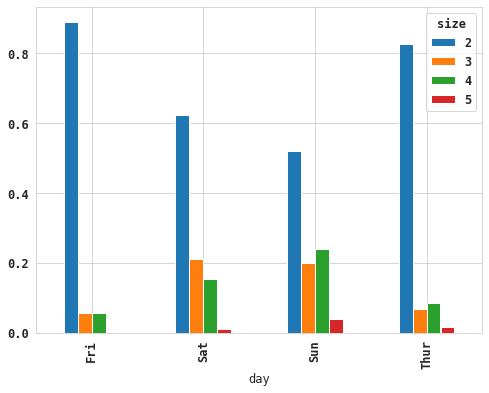

In [24]:
party_pcts.plot.bar()
# 可以从数据集中看出在周末派对数量会增加

In [25]:
# 对于在绘图前需要聚合或汇总的数据，使用seaborn会更简单
import seaborn as sns

# 小费占小费金额的比重
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

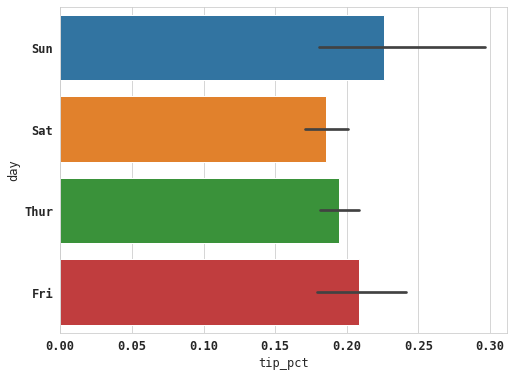

In [26]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
# 柱子的值是tip_pct的平均值，柱子上画出的黑线代表的是95%的置信区间

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

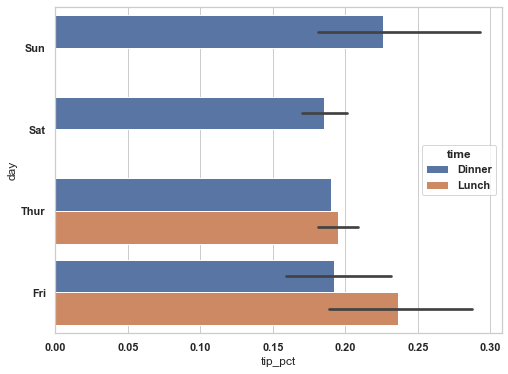

In [27]:
# hue='time'可以根据时间来将day中额外分类值将数据分类
#%matplotlib notebook
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 9.2.3 直方图和密度图

<AxesSubplot:ylabel='Frequency'>

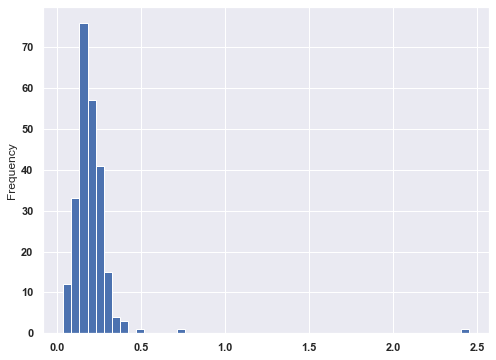

In [32]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

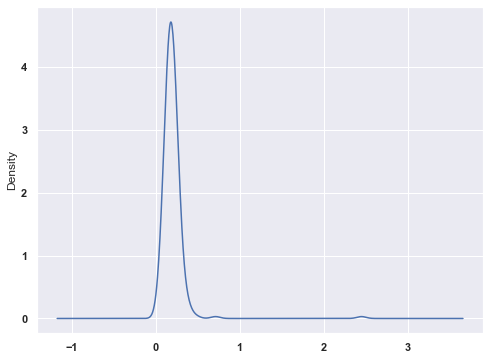

In [33]:
# 密度图
tips['tip_pct'].plot.density()

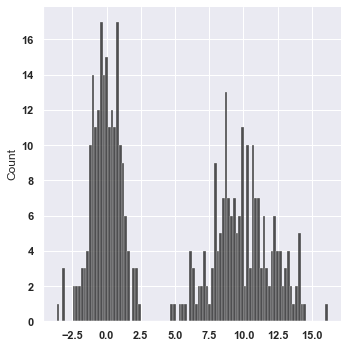

In [34]:
# distplot方法可以绘制直方图和连续密度估计
# 考虑有两个不同的标准正态分布组成的双峰分布
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k')

### 9.2.4 散点图或点图

In [38]:
# 散点图或点图用于检验两个一维数据序列之间的关系。
macro = pd.read_csv('./examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

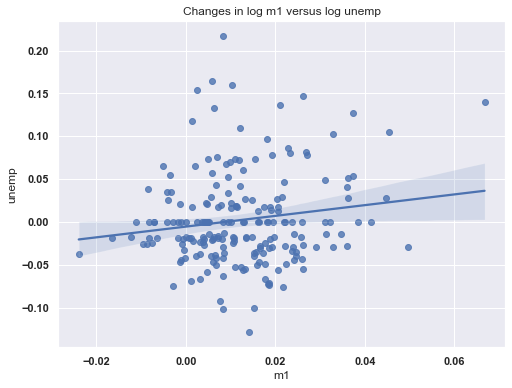

In [41]:
# 可以使用seaborn的regplot方法，该方法可以绘制散点图，并拟合出一条线性回归线
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

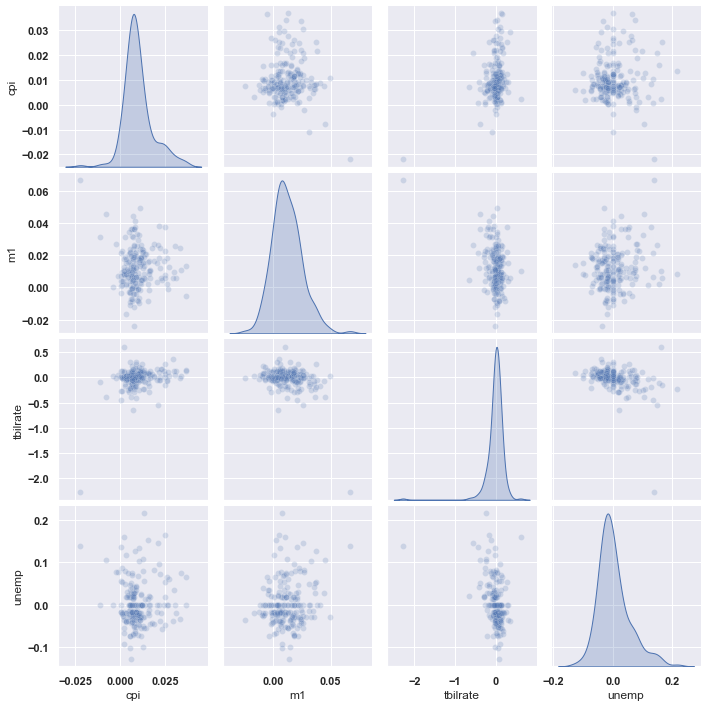

In [42]:
# 在探索数据分析中，能够查看一组变量中的所有散点图是有帮助的，这被称为成对图或散点图矩阵
# 使用seaborn的pairplot函数可以比较方便的画出来
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 分面网格和分类数据

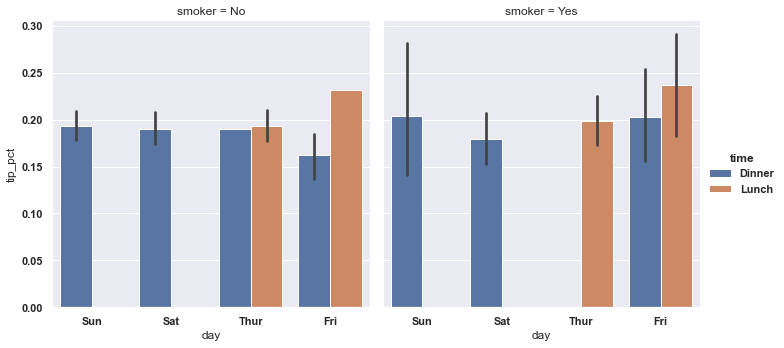

In [45]:
# 如果数据有额外的分组维度，使用分面网格是利用多种分组变量对数据进行可视化的方式
# seaborn有一个有效的内建函数catplot，可以简化多种分面绘图
sns.catplot(x='day',
               y='tip_pct',
               hue='time',
               col='smoker',
               kind='bar',
               data=tips[tips.tip_pct < 1])

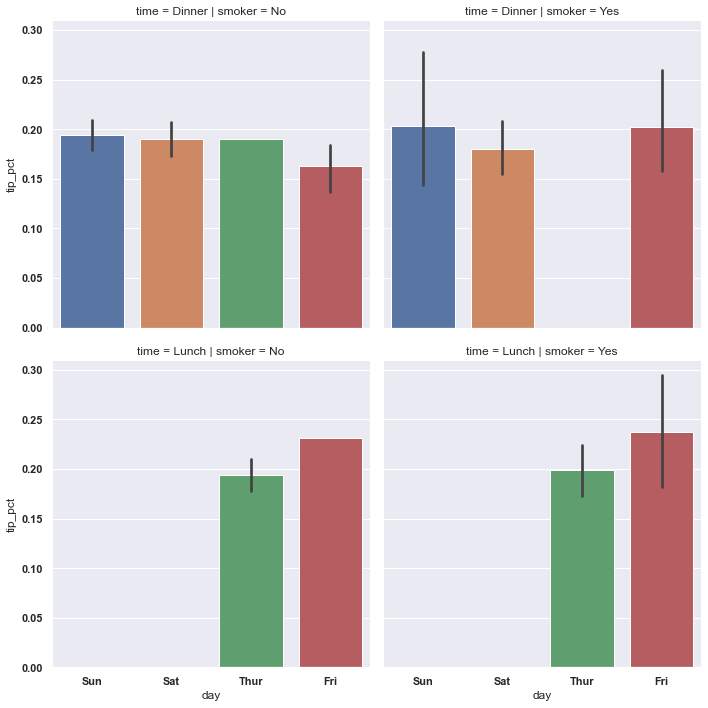

In [46]:
# 还可以通过每个事件值添加一行来扩展分面网络
sns.catplot(x='day',
               y='tip_pct',
               row='time',
               col='smoker',
               kind='bar',
               data=tips[tips.tip_pct < 1])

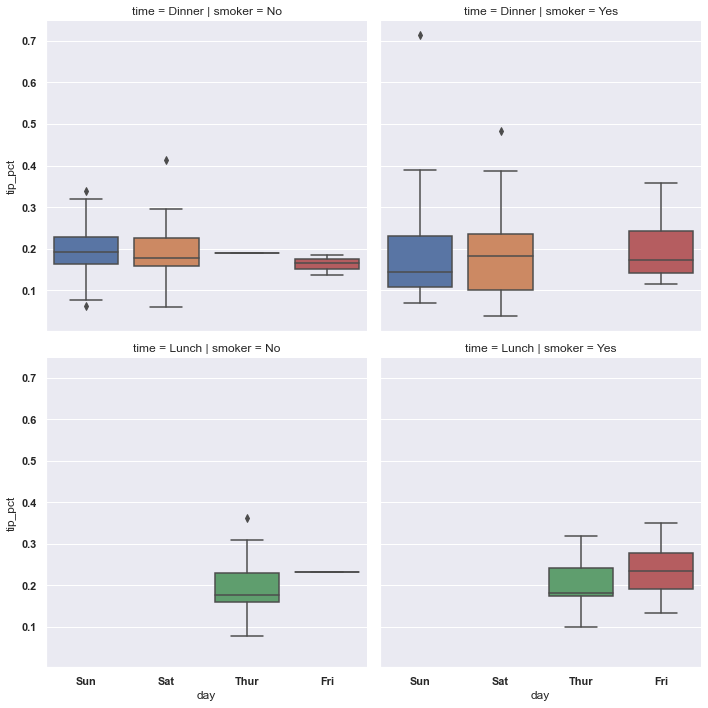

In [47]:
# 图类型为分箱图
sns.catplot(x='day',
               y='tip_pct',
               row='time',
               col='smoker',
               kind='box',
               data=tips[tips.tip_pct < 1])